# real estate price pridictor

In [1]:
import pandas as pd


In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285932,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703863,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006C1972E220>,
      dtype=object)

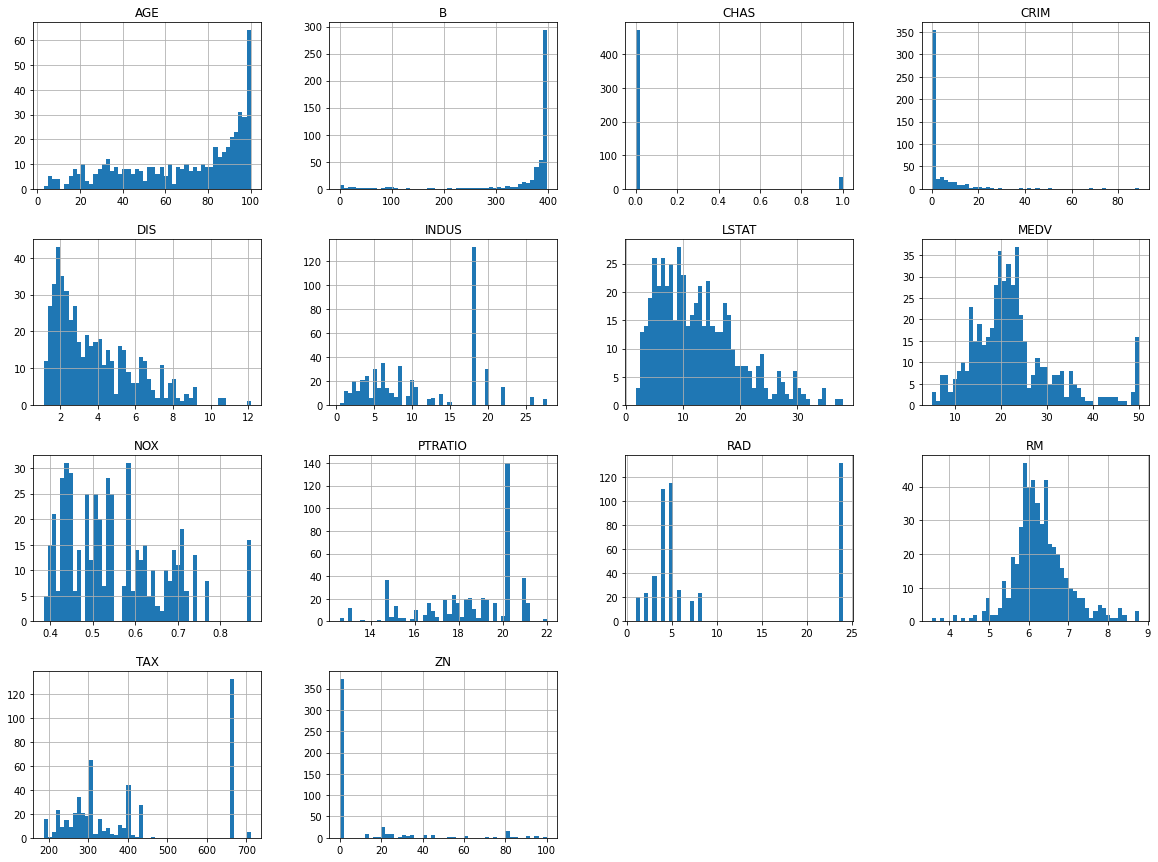

In [9]:
housing.hist(bins=50 , figsize=(20,15))

# train test splitting


In [10]:
# for learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
# train_set , test_set=split_train_test(housing ,0.2)

In [12]:
# print(f"Rows in train set:{len(train_set)}\n Rows in test set : {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing ,test_size=0.2 ,random_state=42)
print(f"Rows in train set:{len(train_set)}\n Rows in test set : {len(test_set)}\n")


Rows in train set:404
 Rows in test set : 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index ,test_index in split.split(housing , housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
# 96/7

In [18]:
# 375/28

# CORRELATION

In [19]:
corr_matrix=housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.693421
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006C250C6910>,
      dtype=object)

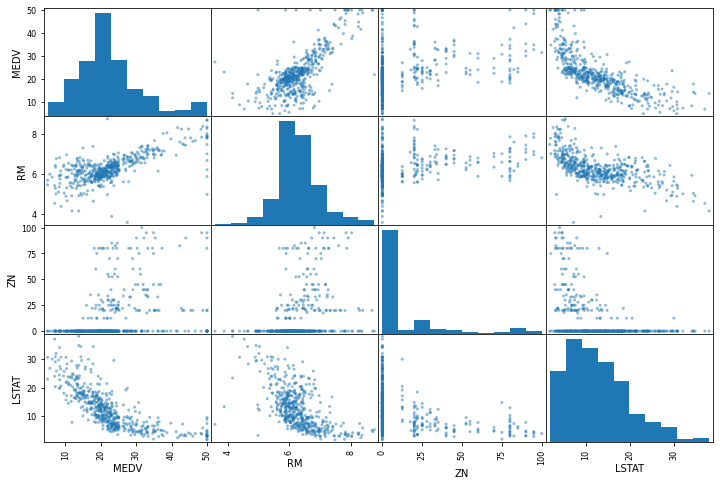

In [21]:
from pandas.plotting import scatter_matrix
attributes =["MEDV" , "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

# trying out attributes combination

In [22]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.693421
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537610
LSTAT     -0.737663
Name: MEDV, dtype: float64

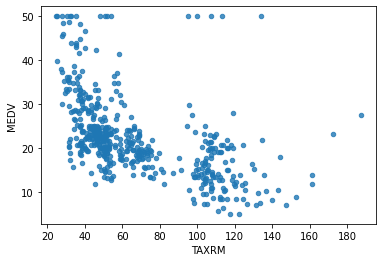

In [25]:
housing.plot(kind="scatter" , x="TAXRM" , y="MEDV" ,alpha=0.8)

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# missing attributes

In [27]:
# to take care of missing attributes you have three option :
#     1) get rid of the missing data points 
#     2) get rid of the whole attributes
#     3)set the value to some value (0 , mean or median)

In [28]:
a=housing.dropna(subset=["RM"]) #option 1
a.shape
#  original houseing dataframe will remain unchanged

(399, 13)

In [29]:
housing.drop("RM", axis=1).shape #option 2
# Note that there is no RM column and also original houseing dataframe will remain unchanged

(404, 12)

In [30]:
median = housing["RM"].median()

In [31]:
housing["RM"].fillna(median)
#  original houseing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [32]:
housing.shape

(404, 13)

In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
x=imputer.transform(housing)

In [36]:
housing_tr=pd.DataFrame(x , columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280668,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710254,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# scikit-learns design

primarily , three type of object
1) Estimators-it estimates some parameter based on dataset for ex-imputer it has 
fit method and transform method.
fit method - fits the dataset and calculates internal parameters

2) Transformers-transform method takes input and returns output based on the 
learnings from fit() . it also has a convenience function called fit_transform()
which and then transforms.

3) predictors-linearregression model is an example of predictor . fit() and 
predict() are two common functions . it also gives score function which will 
evaluate the predictions

# featuring scaling

primarily two type of featuring scaling method :

1) min-max scaling (Normalisation) 
     
      ( value- min)/( max - min)
      sklearn provide a class called MinMaxScaler for this 
      
 2) standardisation 
 
      (Value - Min)/std
     
      sklearn provides a class called Standardscaler for this 
      

# creating a pipelines

In [38]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('impute' , SimpleImputer(strategy="median")),
    #add as many as you want in your pipeline 
    ('std_scaler',StandardScaler())
])

In [39]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [40]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [41]:
housing_num_tr.shape

(404, 13)

# selecting the desired model for real estates

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 model=RandomForestRegressor()
# model=LinearRegression()
#  model=DecisionTreeRegressor()
model.fit(housing_num_tr , housing_labels)

IndentationError: unexpected indent (<ipython-input-57-6a9a9b9459f2>, line 6)

In [43]:
some_data=housing.iloc[:5]

In [44]:
some_labels=housing_labels.iloc[:5]

In [45]:
prepared_data=my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([22.524, 25.278, 16.792, 23.414, 23.617])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [49]:
rmse

1.215906947691945

# Using better evaluation -Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels, scoring="neg_mean_squared_error")
rmse_scores=np.sqrt(-scores)

In [51]:
rmse_scores

array([2.89440045, 3.64125985, 3.16477418, 4.30322833, 3.13765683])

In [52]:
def print_scores(scores):
    print("Scores" , scores)
    print("Mean" , scores.mean())
    print("Standard deviation:" ,scores.std())

In [53]:
print_scores(rmse_scores)

Scores [2.89440045 3.64125985 3.16477418 4.30322833 3.13765683]
Mean 3.4282639282438168
Standard deviation: 0.4999638996533588


# Saving the model

In [58]:
 from joblib import dump, load
 dump(model, 'Estate.joblib') 

['Estate.joblib']

# Testing the Model on test data

In [65]:
X_test=strat_test_set.drop("MEDV" , axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
# print(final_predictions,list(Y_test))

[24.769 11.821 25.398 21.904 19.213 14.982 20.737 14.711 31.382 41.936
 19.5   12.004 23.978 24.993 19.861 11.098 31.7   14.369 23.668 19.378
 20.103 17.705 18.58  22.    18.831 31.331 16.369 33.253  8.806 33.67
 24.102 21.485 23.214 11.218 20.991 11.458 43.941 24.575 23.541 42.399
 24.169 29.462 20.439 20.435 19.172 32.77  44.983 20.402 20.61  22.196
 21.47  14.617 21.464 14.861 25.241 32.526 41.113 29.3   19.391 20.505
 46.462  9.234 18.883 28.222 15.09  33.698 20.059 18.042 19.074 33.633
 26.212 23.056 21.381 22.788 34.068 12.893 15.781 20.155 20.839 21.188
 22.609 21.023 13.951 22.876 20.286 21.169 13.815 21.729 22.001 23.196
 18.63  27.131  7.111 27.211 18.581 29.178 20.175 31.531 14.445 27.213
 21.32  20.287] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [62]:
final_rmse

2.9493754972077415

In [66]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2434092 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])